<a href="https://colab.research.google.com/github/MartinPdeS/PyMieSim/blob/master/MieSIm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Public package download and install**
==========================================


In [1]:
!apt-get install libproj-dev proj-data proj-bin  
!apt-get install libgeos-dev

!pip3 install git+https://github.com/MartinPdeS/PyMieSim.git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following NEW packages will be installed:
  libproj-dev proj-bin
0 upgraded, 2 newly installed, 0 to remove and 15 not upgraded.
Need to get 232 kB of archives.
After this operation, 1,220 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libproj-dev amd64 4.9.3-2 [199 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 232 kB in 2s (119 kB/s)
Selecting previously unselected package libproj-dev:amd64.
(Reading database ... 146442 files and directories currently installed.)
Preparing to unpack .../libproj-dev_4.9.3-2_amd64.deb ...
Unpacking libproj-dev:amd64 (4.9.3-2) ...
Selecting previously unselected package proj-bin.
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.

**0) Scatterer: S1-S2**
==========================================

/usr/local/lib/python3.6/dist-packages/traits/etsconfig/etsconfig.py:415: UserWarning: Environment variable "HOME" not set, setting home directory to /tmp
  % (environment_variable, parent_directory)


[S1S2] C++ module loaded
[GetFields] Cython module loaded


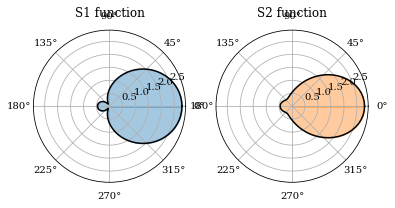

In [3]:
from PyMieSim.classes.Scattering import Scatterer
from PyMieSim.Physics import Source

LightSource = Source(Wavelength = 450e-9,
                  Polarization = 0,
                  Power = 1,
                  Radius = 1)

Scat = Scatterer(Diameter    = 300e-9,
                 Source      = LightSource,
                 Index       = 1.4)


S1S2 = Scat.S1S2(Num=100)

S1S2.Plot()



**1) Scatterer: Full far-field** **bold text**
==========================================

In [4]:
from PyMieSim.classes.Scattering import Scatterer
from PyMieSim.Physics import Source

LightSource = Source(Wavelength = 450e-9,
                  Polarization = 0,
                  Power = 1,
                  Radius = 1)

Scat = Scatterer(Diameter    = 300e-9,
                 Source      = LightSource,
                 Index       = 1.4)


Fields = Scat.Field(Num=100)

print(Fields)


        Object:          Dictionary
        Keys:            Parallel, Perpendicular, Theta, Phi
        Structured data: Yes
        Method:          <Plot>
        Shape:           (100, 100)


**2) Scatterer: phase function**
================================

In [5]:
from PyMieSim.classes.Scattering import Scatterer
from PyMieSim.Physics import Source

LightSource = Source(Wavelength = 450e-9,
                  Polarization = 0,
                  Power = 1,
                  Radius = 1)

Scat = Scatterer(Diameter    = 400e-9,
                 Source      = LightSource,
                 Index       = 1.4)


SPF = Scat.SPF(Num=100)

print(SPF)




        Object:          Dictionary
        Keys:            SPF, Parallel, Perpendicular, Theta, Phi
        Structured data: Yes
        Method:          <Plot>
        Shape:           (100, 100)


**3) Detector: Photodiode**
===========================


In [8]:
from PyMieSim.Physics import Source
from PyMieSim.classes.Detector import Photodiode

LightSource = Source(Wavelength = 450e-9,
                  Polarization = 0,
                  Power = 1,
                  Radius = 1)

Detector = Photodiode(NA                = 0.8,
                      Sampling          = 1001,
                      GammaOffset       = 0,
                      PhiOffset         = 0)


print(Detector)

**4) Detector: LPMode**
==========================================

In [9]:
from PyMieSim.Physics import Source
from PyMieSim.classes.Detector import LPmode

LightSource = Source(Wavelength = 450e-9,
                  Polarization = 0,
                  Power = 1,
                  Radius = 1)

Detector = LPmode(Mode         = (1, 1,'h'),
                  Sampling     = 201,
                  NA           = 0.2,
                  GammaOffset  = 0,
                  PhiOffset    = 0,
                  CouplingMode = 'Centered')


print(Detector)


        LP mode detector
        Coupling Mode: Amplitude
        LP Mode:       (2, 1, 'h')
        Sampling:      201
        Gamma offset:  0
        Phi offset:    0
        


**5) Coupling: Scatterer-LPMode**
==========================================

In [8]:
from PyMieSim.Physics import Source
from PyMieSim.classes.Detector import LPmode
from PyMieSim.classes.Scattering import Scatterer

LightSource = Source(Wavelength = 450e-9,
                  Polarization = 0,
                  Power = 1,
                  Radius = 1)

Detector = LPmode(Mode         = (1, 1,'h'),
                  Sampling     = 201,
                  NA           = 0.2,
                  GammaOffset  = 0,
                  PhiOffset    = 0,
                  CouplingMode = 'Centered')


Scat = Scatterer(Diameter    = 400e-9,
                 Source      = LightSource,
                 Index       = 1.4)

Coupling = Detector.Coupling(Scatterer = Scat)

print(Coupling)

1.8440827937247691e-07


**6) ScattererSet: Qscattering**
==========================================

[S1S2] C++ module loaded
[Efficiencies] C++ module loaded


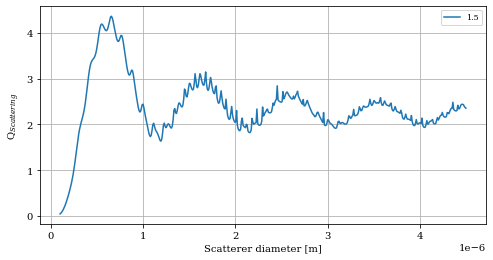

In [6]:
import numpy as np
from PyMieSim.Physics import Source
from PyMieSim.classes.Sets import ScattererSet

LightSource = Source(Wavelength   = 950e-9,
                     Polarization = 0)


ScatSet = ScattererSet(DiameterList  = np.linspace(100e-9, 4500e-9, 500),
                       RIList        = np.linspace(1.5, 1.5, 1).round(1),
                       Source        = LightSource)


Qsca = ScatSet.Qsca()

Qsca.Plot()

**7) ExperimentalSet: Coupling**
==========================================

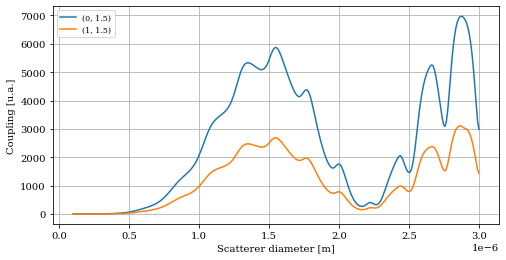

In [7]:
import numpy as np
from PyMieSim.Physics import Source
from PyMieSim.classes.Detector import LPmode
from PyMieSim.classes.Sets import ScattererSet, ExperimentalSet

LightSource = Source(Wavelength   = 950e-9,
                     Polarization = 0)



Detector0 = LPmode(NA                = 0.2,
                   Sampling          = 401,
                   GammaOffset       = 0,
                   PhiOffset         = 20,
                   Mode              = (0,1),
                   CouplingMode      = 'Mean')

Detector1 = LPmode(NA                = 0.2,
                   Sampling          = 401,
                   GammaOffset       = 0,
                   PhiOffset         = 20,
                   Mode              = (1,1),
                   CouplingMode      = 'Mean')





ScatSet = ScattererSet(DiameterList  = np.linspace(100e-9, 3000e-9, 300),
                       RIList        = np.linspace(1.5, 1.5, 1).round(1),
                       Source        = LightSource)





Set = ExperimentalSet(ScattererSet  = ScatSet,
                      Detectors     = (Detector0, Detector1))


Data = Set.DataFrame

Data.Plot(y='Coupling')